In [52]:
import pandas as pd
import matplotlib.pyplot as plt

## Sorting data
- The goal is to sort the data which is necessary for calculating The Bayesian Average of ratings
    - Prior mean
    - Prior weight
    - Average rating of each game
    - Number of rating of each game

In [53]:
df = pd.read_csv("bgg.csv")
df

,game,title,rating
0,25984,Trivial Pursuit: Genus IV – Canadian Edition,3.0
1,25984,Trivial Pursuit: Genus IV – Canadian Edition,5.0
2,25984,Trivial Pursuit: Genus IV – Canadian Edition,3.0
3,25984,Trivial Pursuit: Genus IV – Canadian Edition,7.0
4,25984,Trivial Pursuit: Genus IV – Canadian Edition,6.0
...,...,...,...
1082162,11906,Source of the Nile: Tributary,5.0
1082163,11906,Source of the Nile: Tributary,NaN
1082164,11906,Source of the Nile: Tributary,NaN
1082165,11906,Source of the Nile: Tributary,NaN


In [54]:
df_sorted = df.sort_values(['title', 'rating'], ascending=(True, True))
df_sorted

,game,title,rating
28668,30457,!dentity Crisis?,2.00
28658,30457,!dentity Crisis?,3.00
28660,30457,!dentity Crisis?,5.00
28669,30457,!dentity Crisis?,5.00
28663,30457,!dentity Crisis?,6.00
...,...,...,...
773346,177572,猿道 (Monkey Road),7.00
773347,177572,猿道 (Monkey Road),8.56
773343,177572,猿道 (Monkey Road),NaN
773345,177572,猿道 (Monkey Road),NaN


- All NAN values are removed

In [55]:
df2=df_sorted.dropna().reset_index(drop=True)
df2

,game,title,rating
0,30457,!dentity Crisis?,2.00
1,30457,!dentity Crisis?,3.00
2,30457,!dentity Crisis?,5.00
3,30457,!dentity Crisis?,5.00
4,30457,!dentity Crisis?,6.00
...,...,...,...
706808,177572,猿道 (Monkey Road),6.50
706809,177572,猿道 (Monkey Road),7.00
706810,177572,猿道 (Monkey Road),7.00
706811,177572,猿道 (Monkey Road),7.00


In [56]:
df3 = df2[['game', 'title']]
df3

,game,title
0,30457,!dentity Crisis?
1,30457,!dentity Crisis?
2,30457,!dentity Crisis?
3,30457,!dentity Crisis?
4,30457,!dentity Crisis?
...,...,...
706808,177572,猿道 (Monkey Road)
706809,177572,猿道 (Monkey Road)
706810,177572,猿道 (Monkey Road)
706811,177572,猿道 (Monkey Road)


In [57]:
game_ratings_sum = df2.groupby('title')['rating'].sum()
game_ratings_sum

title
!dentity Crisis?                                        52.60
#MyLife                                                 40.00
&Cetera                                                226.50
'65: Squad-Level Combat in the Jungles of Vietnam      304.50
'CA' Tactical Naval Warfare in the Pacific, 1941-45    167.00
                                                        ...  
なつめも (Natsumemo)                                       142.50
ひとひら (Hitohira)                                         74.00
カマクラコレクション (Kamakura Collection)                        30.00
ボブジテン (Bob Jiten)                                       44.00
猿道 (Monkey Road)                                        52.06
Name: rating, Length: 23264, dtype: float64

In [58]:
dftitle=df2['title'].value_counts()
dftitle

title
Cosmic Encounter                        312
Gettysburg                              221
Dune                                    198
Lord of the Rings: The Confrontation    169
Arkham Horror                           167
                                       ... 
The LogiQuad Game System                  1
I'm a Celebrity                           1
Ceuta                                     1
Centre Chess                              1
Putsch au Panador                         1
Name: count, Length: 23264, dtype: int64

In [59]:
game_ratings_average = df2.groupby('title')['rating'].mean()
game_ratings_average

title
!dentity Crisis?                                       5.844444
#MyLife                                                5.714286
&Cetera                                                7.306452
'65: Squad-Level Combat in the Jungles of Vietnam      7.612500
'CA' Tactical Naval Warfare in the Pacific, 1941-45    4.513514
                                                         ...   
なつめも (Natsumemo)                                       7.916667
ひとひら (Hitohira)                                        6.166667
カマクラコレクション (Kamakura Collection)                       7.500000
ボブジテン (Bob Jiten)                                      7.333333
猿道 (Monkey Road)                                       5.784444
Name: rating, Length: 23264, dtype: float64

In [60]:
table1=game_ratings_sum

In [61]:
table2=dftitle

In [62]:
table3=game_ratings_average

In [63]:
left=pd.merge(table1, table2, on = 'title')
left

,rating,count
title,,
!dentity Crisis?,52.60,9
#MyLife,40.00,7
&Cetera,226.50,31
'65: Squad-Level Combat in the Jungles of Vietnam,304.50,40
"'CA' Tactical Naval Warfare in the Pacific, 1941-45",167.00,37
...,...,...
なつめも (Natsumemo),142.50,18
ひとひら (Hitohira),74.00,12
カマクラコレクション (Kamakura Collection),30.00,4


In [64]:
full_table=pd.merge(left, table3, on='title')
full_table

,rating_x,count,rating_y
title,,,
!dentity Crisis?,52.60,9,5.844444
#MyLife,40.00,7,5.714286
&Cetera,226.50,31,7.306452
'65: Squad-Level Combat in the Jungles of Vietnam,304.50,40,7.612500
"'CA' Tactical Naval Warfare in the Pacific, 1941-45",167.00,37,4.513514
...,...,...,...
なつめも (Natsumemo),142.50,18,7.916667
ひとひら (Hitohira),74.00,12,6.166667
カマクラコレクション (Kamakura Collection),30.00,4,7.500000


In [65]:
full_table.rename(columns={'rating_x': 'rating_sum', 'count': 'rating_number', 'rating_y': 'rating_average'}, inplace=True)
full_table

,rating_sum,rating_number,rating_average
title,,,
!dentity Crisis?,52.60,9,5.844444
#MyLife,40.00,7,5.714286
&Cetera,226.50,31,7.306452
'65: Squad-Level Combat in the Jungles of Vietnam,304.50,40,7.612500
"'CA' Tactical Naval Warfare in the Pacific, 1941-45",167.00,37,4.513514
...,...,...,...
なつめも (Natsumemo),142.50,18,7.916667
ひとひら (Hitohira),74.00,12,6.166667
カマクラコレクション (Kamakura Collection),30.00,4,7.500000


In [66]:
prior_weight=full_table['rating_number'].mean()
prior_weight

30.382264442916092

In [67]:
prior_mean= full_table['rating_average'].mean()
prior_mean

6.119832661544632

## The full rating table
- The goal is to create a table which shows both the average ratings and the bayesian average ratings

In [69]:
from Board_Game_Project.function import Function_Bayesian_Average

ImportError: cannot import name 'Function_Bayesian_Average' from 'Board_Game_Project.function' (C:\GitHub\dscoding-projects\chi.hoang\Board_Game_Project\function.py)

In [70]:
full_table['bayesian_average'] = full_table.apply(lambda row: Function_Bayesian_Average(row), axis = 1)
full_table

,rating_sum,rating_number,rating_average,bayesian_average
title,,,,
!dentity Crisis?,52.60,9,5.844444,6.056898
#MyLife,40.00,7,5.714286,6.043892
&Cetera,226.50,31,7.306452,6.719113
'65: Squad-Level Combat in the Jungles of Vietnam,304.50,40,7.612500,6.968153
"'CA' Tactical Naval Warfare in the Pacific, 1941-45",167.00,37,4.513514,5.237793
...,...,...,...,...
なつめも (Natsumemo),142.50,18,7.916667,6.788322
ひとひら (Hitohira),74.00,12,6.166667,6.133093
カマクラコレクション (Kamakura Collection),30.00,4,7.500000,6.280400


Table of Average ratings:

In [71]:
Sub_table1 = full_table[['rating_number', 'rating_average']]
Average_table = Sub_table1.sort_values(by='rating_average', ascending=False)
Average_table

,rating_number,rating_average
title,,
Zamitar,1,10.0
Junk,2,10.0
David Dickinson's Antique Chase,1,10.0
Baseball Mania,1,10.0
Medieval Warfare,1,10.0
...,...,...
Piratack,2,1.0
Barbary Coast War (Second Edition),4,1.0
Don't Point the Finger,2,1.0


Table of Bayesian Average ratings:

In [72]:
Sub_table2 = full_table[['rating_number', 'bayesian_average']]
Bayesian_table = Sub_table2.sort_values(by='bayesian_average', ascending=False)
Bayesian_table

,rating_number,bayesian_average
title,,
Dungeon Universalis,79,8.681246
TerroriXico,43,8.352623
Core Space,76,8.279899
Skytear,69,8.254334
Goblin Grapple,88,8.173812
...,...,...
Bunco,74,3.519510
Chutes and Ladders,84,3.512471
Tic-Tac-Toe,90,3.474635


## Data visualization
- The goal is to graphically spot the difference in considering Average and Bayesian average in rating games 

In [73]:
import numpy as np

In [74]:
plt.style.use('_mpl-gallery')

Scatter plot 'Game ratings based on Average score'

In [75]:
x = full_table['rating_number']
y = full_table['rating_average']

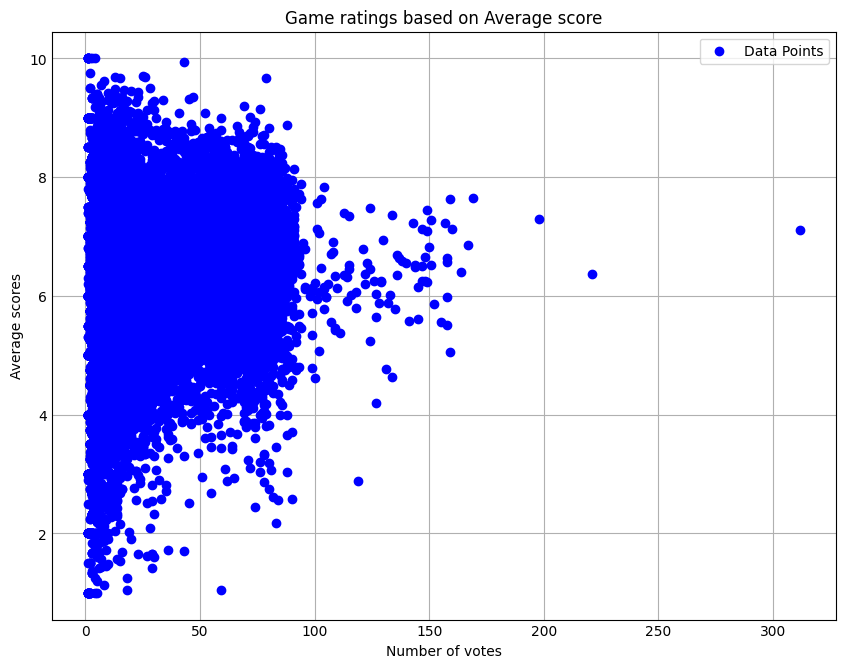

In [76]:
plt.figure(figsize=(8,6))
plt.scatter(x,y, color='b', label="Data Points")
plt.xlabel('Number of votes')
plt.ylabel('Average scores')
plt.title('Game ratings based on Average score')
plt.legend()
plt.grid(True)
plt.show()

Scatter plot 'Games ratings based on Bayesian Average score'

In [77]:
x = full_table['rating_number']
z = full_table['bayesian_average']

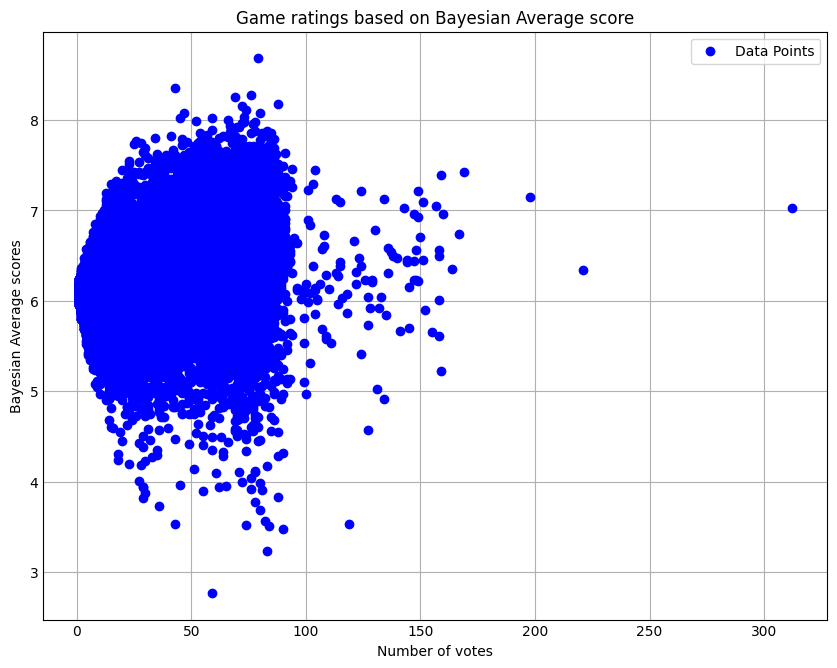

In [78]:
plt.figure(figsize=(8,6))
plt.scatter(x,z, color='b', label="Data Points")
plt.xlabel('Number of votes')
plt.ylabel('Bayesian Average scores')
plt.title('Game ratings based on Bayesian Average score')
plt.legend()
plt.grid(True)
plt.show()